In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Make charts look better
sns.set(style="whitegrid")

# Load dataset
df = pd.read_csv(r"C:\users\dell\Documents\retail-sales-performance-analysis\data\raw\retail_sales_dataset.csv")

# Preview
df.head()


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [3]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [4]:
df = df.drop_duplicates()


In [6]:
df.columns


Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')

In [13]:
df.columns = df.columns.str.strip()


In [14]:
df.rename(columns={'Date': 'Order Date'}, inplace=True)


In [17]:
df.rename(columns={'Price per Unit': 'Unit Price'}, inplace=True)

In [15]:
df['Order Date'] = pd.to_datetime(df['Order Date'])


In [18]:
df['Month'] = df['Order Date'].dt.to_period('M')
df['Revenue'] = df['Quantity'] * df['Unit Price']


In [19]:
df = df.dropna()


In [20]:
df.to_csv(r"C:\users\dell\Documents\retail-sales-performance-analysis\data\cleaned\cleaned_sales.csv", index=False)


# Total Sales

In [23]:
total_sales = df['Revenue'].sum()
print("Total Sales:", total_sales)


Total Sales: 456000


# Sales by Category

In [30]:
category_sales = df.groupby('Product Category')['Revenue'].sum().sort_values(ascending=False)
category_sales


Product Category
Electronics    156905
Clothing       155580
Beauty         143515
Name: Revenue, dtype: int64

# Monthly Sales Trend


In [36]:
monthly_sales = df.groupby('Month')['Revenue'].sum()
monthly_sales


Month
2023-01    35450
2023-02    44060
2023-03    28990
2023-04    33870
2023-05    53150
2023-06    36715
2023-07    35465
2023-08    36960
2023-09    23620
2023-10    46580
2023-11    34920
2023-12    44690
2024-01     1530
Freq: M, Name: Revenue, dtype: int64

# Top 10 Products

In [41]:
top_products = df.groupby('Product Category')['Revenue'].sum().sort_values(ascending=False).head(10)
top_products


Product Category
Electronics    156905
Clothing       155580
Beauty         143515
Name: Revenue, dtype: int64

# Sales by Category

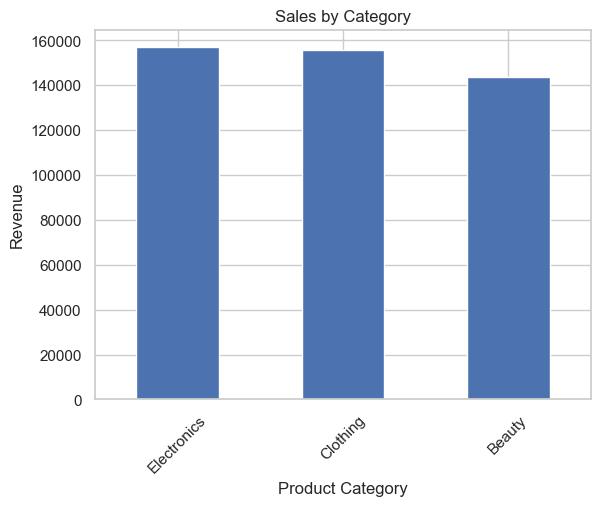

In [37]:
plt.figure()
category_sales.plot(kind='bar')
plt.title("Sales by Category")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.show()


## Key Insight

- Electronics category generates the highest revenue.

# Monthly Trend

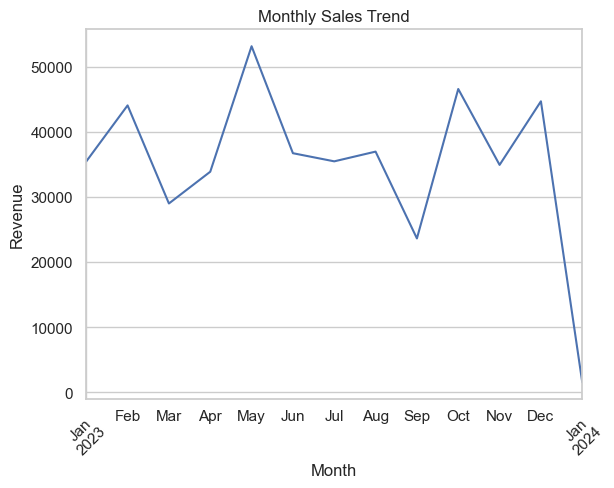

In [38]:
plt.figure()
monthly_sales.plot()
plt.title("Monthly Sales Trend")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.show()


## Key Insight

- Sales peak during (February, May, October and December) specific months.



# Top 10 Products Chart

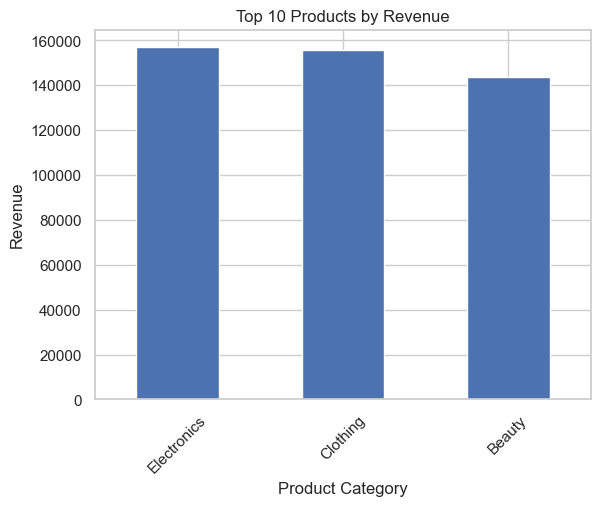

In [39]:
plt.figure()
top_products.plot(kind='bar')
plt.title("Top 10 Products by Revenue")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.show()


## Key Insight

- Electronics product drive most revenue.